# پیش‌بینی بیماری قلبی بر اساس ویژگی‌های پزشکی بیماران با استفاده از یادگیری ماشین

Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

## بارگذاری و بررسی اولیه داده‌ها

### ایمپورت کتابخانه و بارگذاری داده

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### بررسی شکل و ستون‌ها

In [3]:
# تعداد ردیف و ستون
print("شکل داده‌ها:", df.shape)

# نام ستون‌ها و نوع داده‌ها
df.info()

شکل داده‌ها: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### چک کردن مقادیر گمشده

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## تحلیل آماری و تصویری اولیه 

### بررسی آماری اولیه

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  بررسی توزیع بیماری (target)

In [6]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

 چند نفر بیماری دارن (1) و چند نفر ندارن (0)

### نمودار توزیع سن

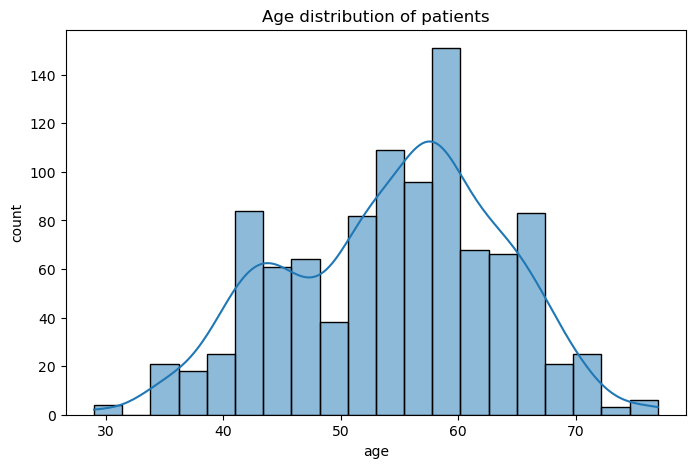

In [7]:
import matplotlib.pylab as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age distribution of patients')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

###  نمودار تعداد افراد سالم/مبتلا:

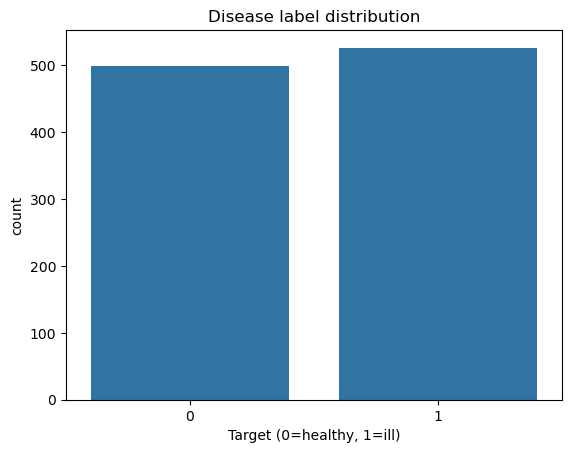

In [8]:
sns.countplot(x='target', data=df)
plt.title('Disease label distribution')
plt.xlabel('Target (0=healthy, 1=ill)')
plt.ylabel('count')
plt.show()

### نمودار توزیع سن افراد بیمار

#### روش ۱: فقط نمایش توزیع سن بیماران (بدون گروه‌بندی)

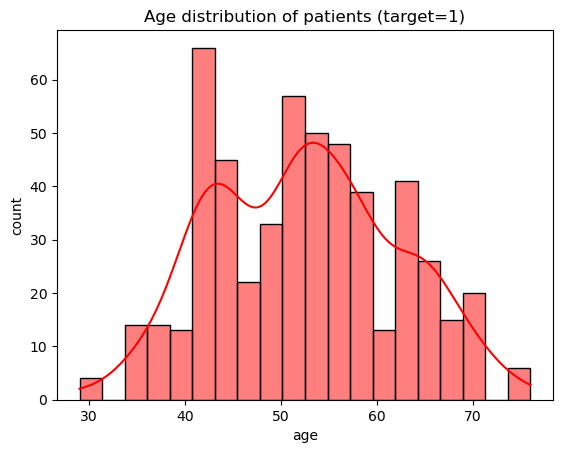

In [9]:
sns.histplot(df[df['target'] == 1]['age'], bins=20, kde=True, color='red')
plt.title('Age distribution of patients (target=1)')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#### روش ۲: گروه‌بندی سنی + مقایسه بیمار و سالم

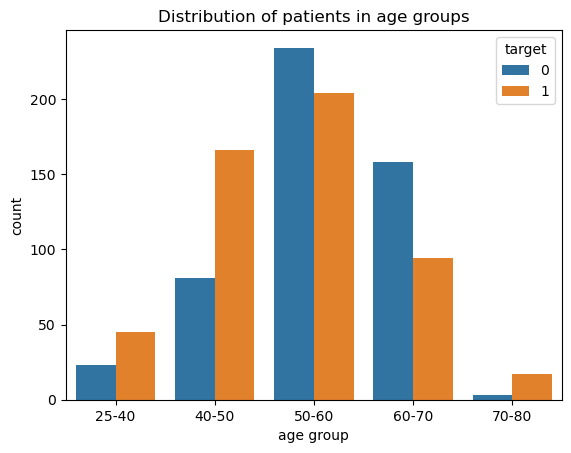

In [10]:
# ایجاد ستون جدید برای گروه‌های سنی

df['age_group'] = pd.cut(df['age'], bins=[25, 40, 50, 60, 70, 80], labels=['25-40', '40-50', '50-60', '60-70', '70-80'])

# شمارش بیماران در هر گروه سنی
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Distribution of patients in age groups')
plt.xlabel('age group')
plt.ylabel('count')
plt.show()

**ستون age_group**

- یه مشتق‌شده از ستون age هست
- از نوع category (چون با pd.cut() ساخته شده)
- در واقع کمک‌بصری بود برای تحلیل‌های EDA (مثلاً نمودار دسته‌ای)

✅ حالا برای مدل‌سازی چند تا انتخاب داری:

🔹 گزینه 1: حذفش

اگر فقط بصری بود و همون اطلاعاتو age عددی داره، پس:

X = X.drop('age_group', axis=1)

(این پیشنهاد پیش‌فرضه چون ستون age خودش دقیق‌تره و نرمال‌پذیر هم هست.)

🔹 گزینه 2: تبدیل به عدد (encoding)

اگر بخوای نگهش داری (مثلاً برای مدل‌های خاص مثل Tree-based)، می‌تونی:

X['age_group'] = X['age_group'].cat.codes

🔹 گزینه 3: One-Hot Encoding (پیشرفته‌تر)

X = pd.get_dummies(X, columns=['age_group'])

(ولی برای الان پیشنهاد نمی‌کنم چون age هست و کافی‌ه.)

✅ نتیجه نهایی پیشنهادی:

برای مدل‌سازی با Logistic Regression یا StandardScaler:

🔥 بهتره age_group رو حذف کنی و فقط از age استفاده کنیم

## پیش‌پردازش داده‌ها

**هدف:**

- داده‌ها رو برای مدل‌های ماشین لرنینگ آماده کنیم
-  Encoding، Scaling، حذف ستون اضافی در صورت نیاز

### ۱. بررسی اینکه آیا ستون غیرعددی داریم یا نه؟

In [11]:
df.dtypes
# → اگر همه ستون‌ها int یا float باشند، نیاز به Encoding نداریم.

age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target          int64
age_group    category
dtype: object

### ۲. بررسی مقادیر یونیک در ستون‌هایی مثل cp, thal, slope

**نکته:**

چون بعضی مدل‌ها با عددگذاری ترتیبی یا کدگذاری One-Hot بهتر کار می‌کنن

In [12]:
df[['cp', 'thal', 'slope']].nunique()

cp       4
thal     4
slope    3
dtype: int64

### ۳. جدا کردن ویژگی‌ها و برچسب هدف

In [13]:
X = df.drop(['target'], axis=1)
# انتخاب همه ستونها بجز target

y = df['target']

###  ۴. نرمال‌سازی ویژگی‌ها

برای مدل‌هایی مثل Logistic Regression خیلی کمک می‌کنه:

**حذف age_group**

In [14]:
X = X.drop('age_group', axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## آموزش مدل و ارزیابی اولیه
مدل پایه‌مون: Logistic Regression

📦 کاری که انجام می‌دیم:

- تقسیم داده به آموزش / آزمون

-  ساخت و آموزش مدل

-  پیش‌بینی روی داده تست

-  ارزیابی با:

        دقت (Accuracy)

        Confusion Matrix

        Classification Report



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تقسیم داده ها
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ساخت و آموزش مدل
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# پیش بینی
y_pred = model.predict(X_test)

# ارزیابی
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🎯 Accuracy: 0.7951219512195122

📊 Confusion Matrix:
 [[73 29]
 [13 90]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



**Logistic Regression تحلیل خروجی مدل:**

- accuracy: 0.80 (80٪ دقت):

یعنی 80٪ از نمونه‌ها رو درست پیش‌بینی کرده

- Confusion Matrix: [[73 29], [13 90]]

    - 73 نفر رو درست سالم پیش‌بینی کرده  
    - 90 نفر رو درست بیمار پیش‌بینی کرده 
    - فقط 13 نفر بیمار بودن ولی سالم تشخیص داده شدن
    - 29 نفر سالم بودن ولی بیمار پیش‌بینی شدن


| کلاس        | precision | recall | f1-score |
| ----------- | --------- | ------ | -------- |
| 0 (سالم)      | 0.85      | 0.72   | 0.78     |
| 1 (بیمار)     | 0.76      | 0.87   | 0.81     |

**مدل تو در تشخیص بیماران واقعی (کلاس 1) قوی‌تره (Recall = 0.87)**

این در پزشکی خیلی مهمه چون می‌خوای کسی که بیمار هست جا نیفته

**نتیجه:**

- مدل پایه عملکرد خوبی داره
- قابل قبوله برای پروژه رزومه
- ولی می‌تونیم هنوز تقویتش کنیم با:

   - مدل‌های قوی‌تر: Random Forest, XGBoost

   - تکنیک‌هایی مثل SMOTE برای تعادل کلاس‌ها

   - تحلیل اهمیت ویژگی‌ها

## مدل‌های پیشرفته برای طبقه‌بندی بیماری قلبی

### ۱. Random Forest

مدل درختی، مقاوم در برابر overfitting، مناسب برای داده‌های ترکیبی

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🎯 Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))

🎯 Accuracy (Random Forest): 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Random Forest تحلیل خروجی مدل:**

- accuracy: 0.985 (98.5٪ دقت):

یعنی 98.5٪ پیش‌بینی درست—فوق‌العاده بالاست!
    
- Confusion Matrix: [[102 0], [3 100]]

    - همه‌ی افراد سالم (0) کاملاً درست پیش‌بینی شدن  
    - فقط 3 نفر بیمار (1) به اشتباه سالم تشخیص داده شدن

| کلاس      | Precision | Recall | F1-score |
| --------- | --------- | ------ | -------- |
| 0 (سالم)  | 0.97      | 1.00   | 0.99     |
| 1 (بیمار) | 1.00      | 0.97   | 0.99     |



- مدل تقریباً بدون نقص کار کرده
- هم Recall بیماران خوبه (یعنی کسی از قلم نیفتاده)
- هم Precision بالا (مدل مطمئن عمل می‌کنه)

**آیا همه چی واقعاً عالیه؟**

مدل خیلی قوی شده، ولی گاهی:

- Overfitting ممکنه پیش بیاد

- باید روی داده‌های جدید تست شه

پس اگر خواستیم جدی‌ترش کنیم:
-  بزنیم Cross-Validation
- یا مدل XGBoost رو هم امتحان کنیم برای مقایسه

### ۲. XGBoost

تقویت‌شده، سریع، دقیق، مخصوص رقابت‌های Kaggle

In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("🎯 Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))

🎯 Accuracy (XGBoost): 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



| پارامتر                 | توضیح                                                                                                                                                                                                                                                                        |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `eval_metric='logloss'` | **Logarithmic Loss (LogLoss)** تابعی است که عملکرد مدل‌های طبقه‌بندی باینری را می‌سنجد. مقدار آن هرچه کمتر باشد، پیش‌بینی مدل به احتمال واقعی نزدیک‌تر است. این معیار حساس به پیش‌بینی‌های نادرست با اطمینان بالاست. مناسب برای مدل‌هایی است که خروجی احتمال می‌دهند (مثل XGBoost). |
| `random_state=42`       | مقدار عددی ثابتی است که برای تعیین وضعیت اولیه‌ی مولد اعداد تصادفی استفاده می‌شود. باعث می‌شود مدل همیشه با همان داده‌های تصادفی و ترتیب، آموزش ببیند. در نتیجه، **نتایج شما قابل تکرار (reproducible)** خواهند بود. عدد 42 رایج است ولی هر عددی قابل استفاده است.                  |


**نتیجه XGBoost:**

-  مدل XGBoost عالیه، هم از نظر دقت، هم از نظر توازن بین Precision و Recall
-  و چون فقط ۳ بیمار جا افتادن، برای کاربردهایی مثل غربال‌گری پزشکی خیلی قابل قبوله

### Cross Validation

**Cross-Validation**

- یک روش برای ارزیابی عملکرد مدل با اطمینان بیشتر
- به جای اینکه فقط یه بار مدل رو روی train/test split بسنجیم، میایم چند بار این کارو تکرار می‌کنیم با داده‌های مختلف:

| روش معمول | فقط یه بار: 80٪ آموزش، 20٪ تست

| Cross-Validation | چند بار (مثلاً 5 بار): هر بار یه قسمت جدید تست می‌شه


- ارزیابی واقعی‌تر
- کاهش شانس overfitting
- گرفتن میانگین عملکرد مدل

**مثال**

در K-Fold (مثلاً 5-fold) داده به 5 قسمت تقسیم می‌شه، هر بار یکی تست می‌شه، بقیه آموزش.

**آیا Cross-Validation لازمه؟**

| هدف                        | آیا لازم است؟                                              |
| -------------------------- | ---------------------------------------------------------- |
| فقط تمرین و رزومه          |   نه الزاماً—ارزیابی ساده کافیه                           |
| مدل نهایی برای دنیای واقعی |  بله، چون نتیجه‌ پایدارتر و قابل اعتمادتر می‌شه         |
| داده کم                    |  حتماً لازمه چون ممکنه train/test تصادفی گمراه‌کننده باشه |


- مثلاً مدل ما روی این تقسیم‌بندی خوب عمل کرده
-  ولی اگه ۲۰٪ تست یه جور دیگه بود چی؟
    -  Cross-Validation این احتمال رو پوشش می‌ده.


#### Cross-Validation با 5-fold

#####  1. کد Cross-Validation برای Logistic Regression:

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

log_model = LogisticRegression(max_iter=1000)
scores_log = cross_val_score(log_model, X_scaled, y, cv=5)

print("✅ Logistic Regression CV دقت‌ها:", scores_log)
print("📊 Logistic متوسط:", np.mean(scores_log).round(4))


✅ Logistic Regression CV دقت‌ها: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805]
📊 Logistic متوسط: 0.8459


| Fold       | Accuracy  |
| ---------- | --------- |
| Fold 1     | 0.8829    |
| Fold 2     | 0.8537    |
| Fold 3     | 0.8634    |
| Fold 4     | 0.8244    |
| Fold 5     | 0.8049    |
|  میانگین | **0.846** |

- عملکرد خوب و پایدار
- Logistic تو Cross-Validation بهتر عمل کرده—احتمالاً چون داده‌ها در تقسیم ساده کمی چالش‌برانگیز بودن

##### 2. کد Cross-Validation برای XGBoost:

In [20]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
scores_xgb = cross_val_score(xgb_model, X_scaled, y, cv=5)

print("✅ XGBoost CV دقت‌ها:", scores_xgb)
print("📊 XGBoost متوسط:", np.mean(scores_xgb).round(4))


✅ XGBoost CV دقت‌ها: [0.9804878  1.         1.         1.         0.98536585]
📊 XGBoost متوسط: 0.9932


| Fold       | Accuracy   |
| ---------- | ---------- |
| Fold 1     | 0.9805     |
| Fold 2     | 1.000      |
| Fold 3     | 1.000      |
| Fold 4     | 1.000      |
| Fold 5     | 0.9854     |
|  میانگین | **0.9932** |

- یعنی مدل XGBoost تقریباً بی‌نقص و بسیار پایدار
- هیچ فشاری از Overfitting دیده نمی‌شه تو این بخش

**نتیجه Cross Validation:**

| مدل      | میانگین دقت | ثبات عملکرد | پیشنهاد              |
| -------- | ----------- | ----------- | -------------------- |
| Logistic | 84.6٪       | متوسط       | خوب برای مدل پایه    |
| XGBoost  | 99.3٪       | خیلی بالا   | بهترین گزینه فعلاً |


## تحلیل ویژگی‌های مهم (Feature Importance)

**ما این کارو با XGBoost انجام می‌دیم چون مدل نهایی‌مونه و تفسیرش قویه.**

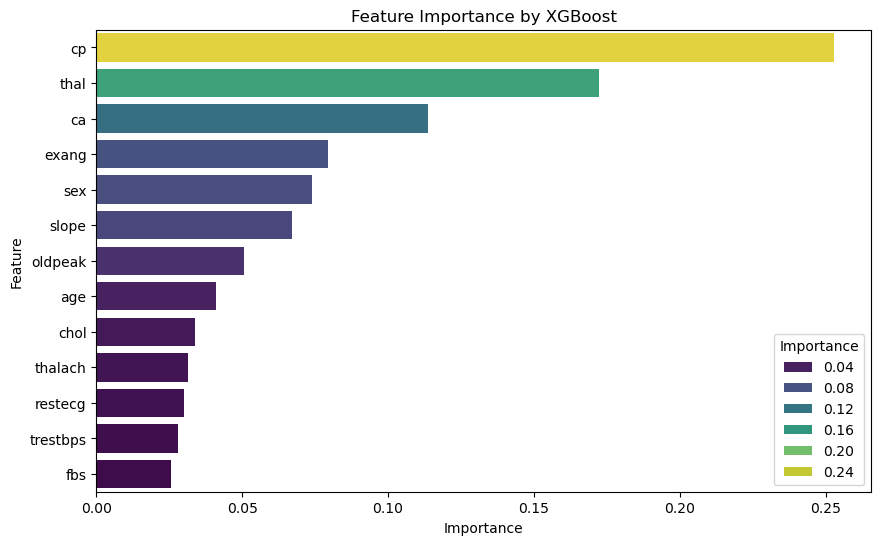

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# اگر X_scaled استفاده کردی و X ستون نداشت، باید دوباره X خام رو با اسم ستون‌ها بگیری
X_columns = X.columns  # فقط در صورتی که اسم ستون‌ها رو داریم

# آموزش دوباره مدل XGBoost روی همه داده‌ها
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_scaled, y)

# اهمیت ویژگی‌ها
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# رسم نمودار
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df,hue='Importance', palette='viridis')
plt.title('Feature Importance by XGBoost')
plt.show()

**تفسیر نمودار Feature Importance:**

| ویژگی                                          | نقش در پیش‌بینی بیماری                                 |
| ------------------------------------------------- | ------------------------------------------------------ |
| **cp** (Chest Pain Type)                          | مهم‌ترین عامل تشخیص بیماریه (0.24)                     |
| **thal** (Thalassemia)                            | مشکلات خونی خاص که اثر زیادی روی سلامت قلب داره (0.16) |
| **ca** (number of vessels colored by fluoroscopy) | یعنی تعداد رگ‌هایی که مسدود بودن—خیلی مهمه (0.12)      |
| **exang** (Exercise Induced Angina)               | آیا درد قفسه‌سینه بعد ورزش ایجاد می‌شه؟ (0.08)         |
| **sex**, **slope**, **oldpeak**                   | فاکتورهای تأثیرگذار متوسط                              |
| **age**, **chol**, **thalach** و بقیه             | نقش کمتر در این مدل—ولی هنوز بی‌اثر نیستن              |


- مدل داره روی فاکتورهای پزشکی مهم تمرکز می‌کنه

- واقعاً داده‌ها خوب هستن برای یادگیری

- ویژگی‌های cp, thal, ca اگر نبودن، مدل خیلی ضعیف می‌شد!

**آیا لازمه همه این مراحل طی بشه؟**

| مرحله                 | کی استفاده کنیم؟                                                         |               |
| --------------------- | ------------------------------------------------------------------------ | ---------------------- |
|  Logistic Regression | همیشه (مدل پایه)                                                         |
|  Random Forest       | اگر Logistic معملکرد خوبی نداشت یا بخوایم مدل قوی‌تر بسازی                 |                        |
|  XGBoost             | وقتی نیاز به دقت بیشتر داریم یا برای رقابت‌های جدی (یا رزومه قوی‌تر)      |                        |
|  Feature Importance  | برای تحلیل‌پذیر کردن مدل و فهم تأثیر عوامل                               |                        |
|  Cross-Validation    | زمانی که می‌خوایم اطمینان بیشتری نسبت به نتایج مدل پیدا کنیم               |                        |
|  SMOTE               | زمانی که کلاس‌ها نامتعادل باشن (مثلاً وقتی تعداد بیماران خیلی کمتر باشه) |                        |


##  مسیر نهایی پروژه: مدل‌سازی و انتشار

###  1: ذخیره مدل آموزش‌دیده

کد ذخیره با joblib:

In [22]:
import joblib

joblib.dump(X.columns.tolist(), 'feature_order.pkl')
joblib.dump(xgb_model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # اگر نرمال‌سازی کردیم

['scaler.pkl']

### 2. ساخت Streamlit برای پیش‌بینی تعاملی

#### ساخت فایل فایل app_heart_disease.py

import streamlit as st

import numpy as np

import joblib

#Load model and scaler

model = joblib.load('heart_disease_model.pkl')

scaler = joblib.load('scaler.pkl')

st.title("Heart Disease Prediction App ❤️")

st.write("با وارد کردن اطلاعات بیمار، احتمال بیماری قلبی را پیش‌بینی کن")

#User input

age = st.slider("سن", 20, 100, 50)

sex = st.selectbox("جنسیت", ["مرد", "زن"])

cp = st.selectbox("نوع درد قفسه‌سینه (cp)", [0, 1, 2, 3])

trestbps = st.number_input("فشار خون استراحتی", 90, 200, 120)

chol = st.number_input("کلسترول", 100, 600, 200)

fbs = st.selectbox("قند خون > 120", [0, 1])

restecg = st.selectbox("نتیجه ECG", [0, 1, 2])

thalach = st.number_input("بیشینه ضربان قلب", 70, 250, 150)

exang = st.selectbox("درد قفسه‌سینه هنگام ورزش", [0, 1])

oldpeak = st.number_input("کاهش ST", 0.0, 6.0, 1.0, step=0.1)

slope = st.selectbox("شیب ST", [0, 1, 2])

ca = st.selectbox("تعداد رگ مسدود", [0, 1, 2, 3, 4])

thal = st.selectbox("تالاسمی", [0, 1, 2, 3])

#Convert inputs

sex = 1 if sex == "مرد" else 0

input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                        thalach, exang, oldpeak, slope, ca, thal]])

input_scaled = scaler.transform(input_data)

#Predict

if st.button("پیش‌بینی"):

    prediction = model.predict(input_scaled)
    
    if prediction[0] == 1:
    
        st.error("❗ احتمال بیماری قلبی وجود دارد")
        
    else:
    
        st.success("✅ نشانه‌ای از بیماری قلبی دیده نمی‌شود")


####  اجرای Streamlit و تست برنامه

تو یه ترمینال مثلا Anaconda Prompt مینویسیم:

streamlit run app_heart_disease.py

**در داشبورد چی میبینیم؟**

- فقط وقتی ca = 0 مدل می‌گه فرد "بیمار" هست (prediction == 1)
- و وقتی ca > 0 مدل تقریباً همیشه می‌گه سالم

**دلیل:**

ویژگی ca (تعداد رگ‌های مسدود) از قبل تو نمودار feature importance هم دیده بودیم که:

 نقش خیلی بزرگی در پیش‌بینی داشت.
 
مدل یاد گرفته که:

- وقتی رگ مسدود نیست (ca=0) → احتمال زیادی داره بیمار باشه
- وقتی رگ‌ها دیده شدن و مسدود بودن (ca>0) → احتمال سالم بودن بیشتره (تو دیتای واقعی این‌طور بوده)

**مشکل کجاست؟**

- . کیفیت و تعادل خود داده

    دیتای موجود (مثلاً Heart Disease UCI یا Kaggle نسخه‌ای که گرفتیم) ممکنه از یک مرکز خاص پزشکی گرفته شده باشه

    !و تو اون مرکز، اکثر افراد بدون هیچ رگ مسدودی احتمالاً واقعاً بیمار بودن

    در نتیجه، مدل هم همین رو یاد گرفته. ولی این به معنی واقعیت عمومی پزشکی نیست

-  مدل خیلی ساده رفتار یاد گرفته

      وقتی یک ویژگی به‌شدت غالب بشه ، ممکنه مدل وابسته به اون ویژگی بشه و سایر فاکتورها رو نادیده بگیره.

    به این حالت می‌گیم مدل unbalanced attention یا bias toward a dominant feature

**"دقت عددی مدل بالاست... ولی درک رفتاری مدل مشکل داره."**

**راه حل**

- استفاده از SHAP یا LIME برای دیدن اثر هر ویژگی روی هر پیش‌بینی
-  جمع‌آوری دیتای واقعی‌تر از مراکز متفاوت
- مهندسی ویژگی (Feature Engineering) پیشرفته‌تر

فهمیدیم که:

مدل حساسه به تعداد رگ های مسدود

و این می‌تونه توی گزارش پروژه بیاد که:

**«طبق تحلیل رفتاری، مدل بیشترین حساسیت را به ویژگی تعداد رگ‌های مسدود دارد و باقی ویژگی‌ها تأثیر کمتری در نتیجه نهایی دارند»**

### SHAP (SHapley Additive exPlanations)

 برای هر پیش‌بینی تکی، نشون بده هر ویژگی چقدر روی تصمیم مدل تأثیر گذاشته

| ویژگی             | توضیح                                                |
| ----------------- | ---------------------------------------------------- |
|  Global Insight | کدوم ویژگی‌ها مهم‌ترن در کل مدل؟                     |
|  Local Insight  | چرا مدل برای **این فرد خاص** گفت بیمار / سالمه؟      |
|  شفافیت مدل     | توجیه‌پذیر کردن رفتار مدل (specially in healthcare!) |


#### مرحله 1: نصب

In [23]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


#### مرحله 2: استفاده از XGBoost

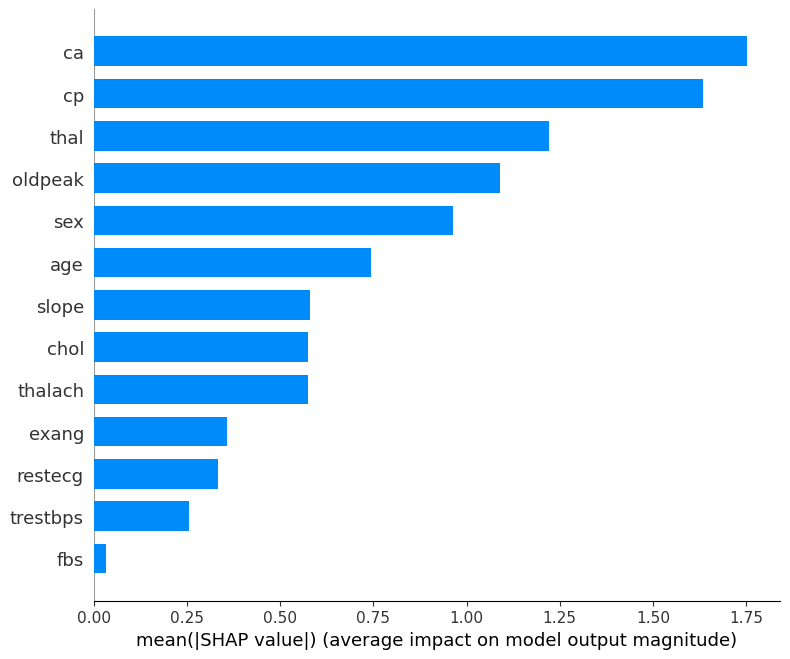

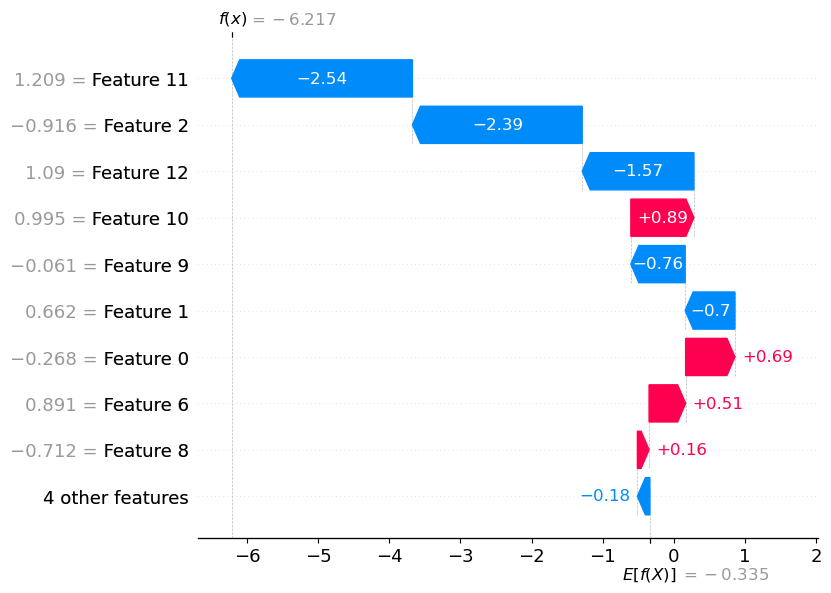

In [24]:
import shap
import matplotlib.pyplot as plt

# ساخت explainer برای XGBoost
explainer = shap.Explainer(xgb_model, X_scaled)

# گرفتن مقادیر shap برای کل داده‌ها
shap_values = explainer(X_scaled)

# 1. نمودار summary برای بررسی کلی اهمیت ویژگی‌ها
shap.summary_plot(shap_values, X, plot_type="bar")

# 2. نمودار دقیق برای اولین فرد (مثلاً فرد 0)
shap.plots.waterfall(shap_values[0])

#####  نمودار اول :SHAP Summary Bar Plot

این نمودار نشون می‌ده در کل مدل، کدوم ویژگی‌ها بیشترین اثر میانگین رو داشتن:

| ویژگی مهم                              | تأثیر کلیدی                      |
| -------------------------------------- | -------------------------------- |
| `ca` (تعداد رگ‌های رنگ‌شده)            | مهم‌ترین ویژگی در کل مدل         |
| `cp` (نوع درد قفسه سینه)               | دومین ویژگی مهم                  |
| `thal` (تالاسمی) و `oldpeak` (کاهش ST) | به‌شدت تأثیرگذار                 |
| `sex`, `age`, `slope`                  | هم مؤثرن ولی کمتر از ۴ ویژگی اول |

**نتیجه: مدل کاملاً وابسته به چند ویژگی کلیدی شده و ممکنه نسبت به بقیه بی‌تفاوت باشه**

##### نمودار دوم: SHAP Waterfall Plot

 برای این فرد خاص، دقیقاً کدوم ویژگی‌ها مدل رو به سمت "بیمار" یا "سالم" سوق دادن؟

🔵 آبی = ویژگی‌هایی که مدل رو به سمت "سالم" بردن

🔴 قرمز = ویژگی‌هایی که مدل رو به سمت "بیمار" بردن

    مثلاً Feature 11 و Feature 2:

    با مقدار بالا → اثر منفی زیاد (سالم‌تر)

    ولی مثلاً Feature 9 یا Feature 0:
    
    مقدار کمی اثر مثبت داشتن (بیمارتر)

اما چون مقدار نهایی خیلی منفی شده، مدل گفت: فرد سالمه.

**جمع‌بندی تصمیم‌ها:**

| تصمیم                                        | چرا؟                                          |
| -------------------------------------------- | --------------------------------------------- |
|  تحلیل SHAP انجام شد                        | برای شفافیت مدل عالیه                         |
|  ویژگی‌های کلیدی مدل شناسایی شدن            | `ca`, `cp`, `thal`, `oldpeak`                 |
|  مدل نسبت به بقیه فیلدها حساسیت پایینی داره | می‌تونه در دنیای واقعی خطرناک باشه            |
|  این تحلیل می‌تونه بخشی از گزارش پروژه باشه | نشون می‌ده تو فقط مدل نساختی، **درک هم کردی** |


### مهندسی ویژگی (Feature Engineering) 

#### افزودن ویژگی age_group

##### ساخت ستون جدید و کدگذاری عددی

In [25]:
def age_group(age):
    if age < 40:
        return 'جوان'
    elif age < 55:
        return 'میانسال'
    else:
        return 'سالمند'

df['age_group'] = df['age'].apply(age_group)
df['age_group_encoded'] = df['age_group'].map({'جوان': 0, 'میانسال': 1, 'سالمند': 2})


##### اضافه کردن ستون جدید به مدل

In [26]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_group_encoded']]

##### scale آموزش مجدد مدل و

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# نرمال‌سازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# آموزش مدل
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = xgb_model.predict(X_test)

# ارزیابی
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



##### بررسی دوباره Feature Importance با SHAP یا .feature_importances_

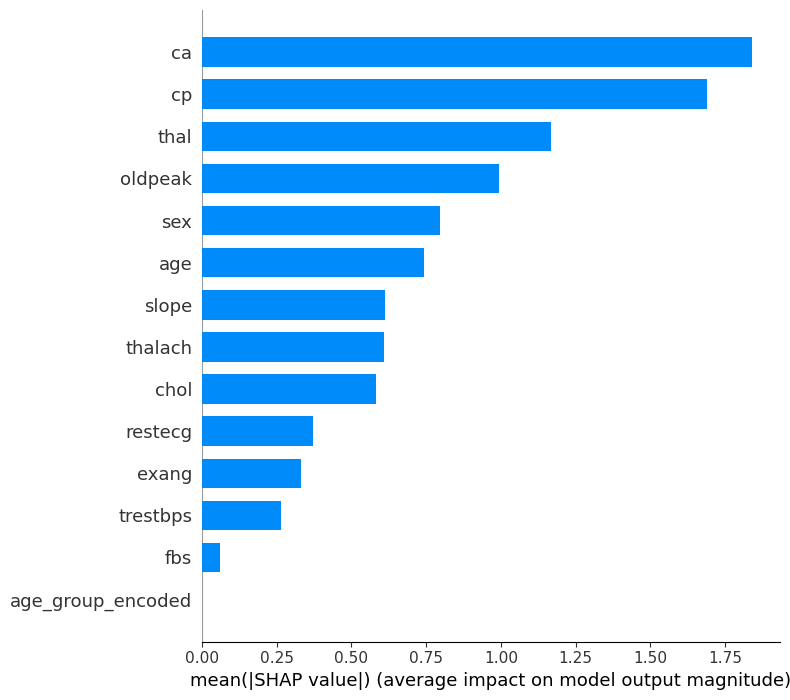

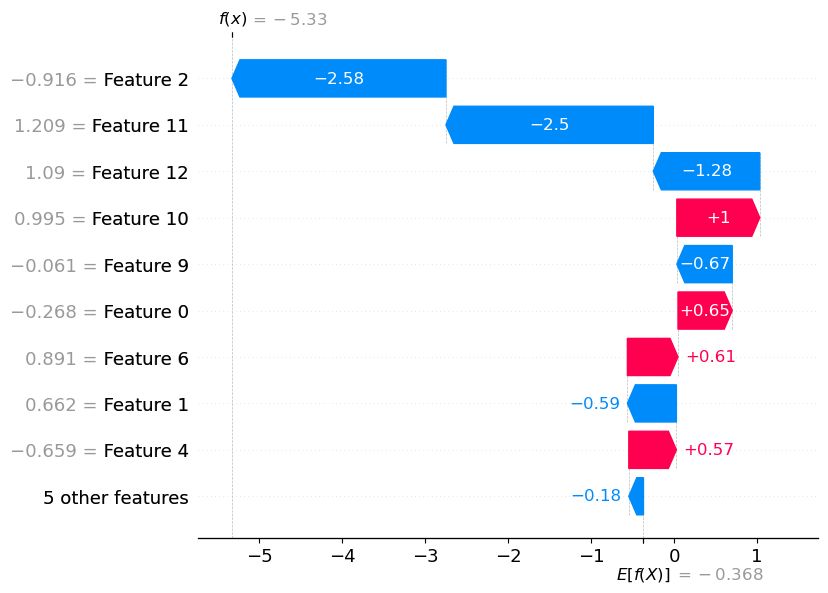

In [28]:
# ساخت explainer برای XGBoost
explainer = shap.Explainer(xgb_model, X_scaled)

# گرفتن مقادیر shap برای کل داده‌ها
shap_values = explainer(X_scaled)

# 1. نمودار summary برای بررسی کلی اهمیت ویژگی‌ها
shap.summary_plot(shap_values, X, plot_type="bar")

# 2. نمودار دقیق برای اولین فرد (مثلاً فرد 0)
shap.plots.waterfall(shap_values[0])

##### **نتیجه نمودار:**

age_group:

- اثر خیلی کمی روی مدل داشته
- توی SHAP هم داخل "5 ویژگی دیگر" قرار گرفت	یعنی مدل تقریباً هیچ تغییر جدی در تصمیم‌گیری بر اساس اون نداشت

**ما یک ویژگی جدید (گروه سنی) مهندسی کردیم تا اثر سن رو بهتر در مدل وارد کنیم،ولی تحلیل نشون داد که این ویژگی تأثیر زیادی نداشت،چون ویژگی‌های "نوع درد قفسه‌سینه" و "تعداد رگهای مسدود" همچنان الگوی غالب مدل هستن.**

#### افزودن ویژگی ترکیبی risk_factor

##### ساخت ستون جدید

In [30]:
df['risk_factor'] = df['chol'] * df['trestbps']

##### اضافه کردن ستون جدید به مدل

In [31]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'risk_factor']]

##### scale آموزش مجدد مدل و

In [33]:
# نرمال‌سازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# آموزش مدل
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = xgb_model.predict(X_test)

# ارزیابی
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🎯 Accuracy: 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



##### بررسی دوباره با SHAP

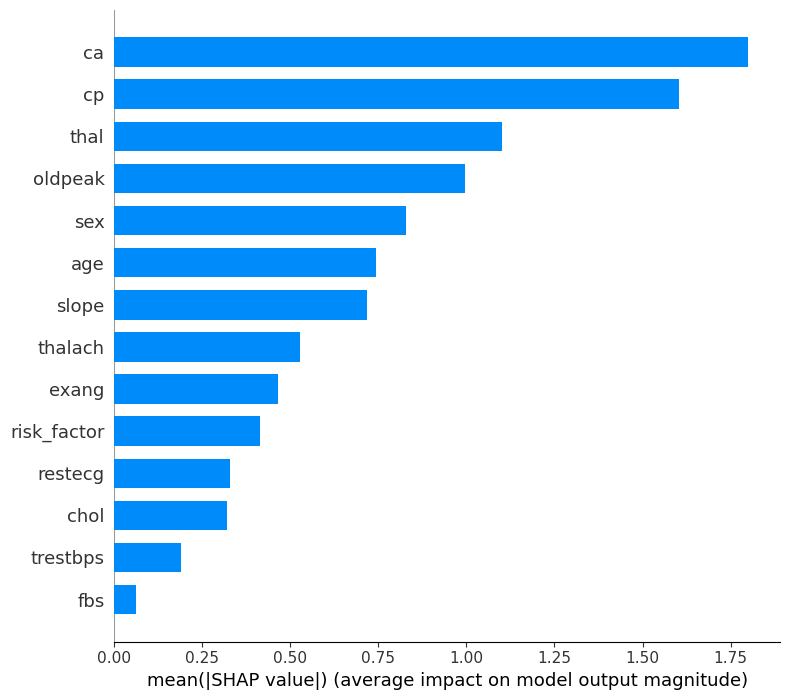

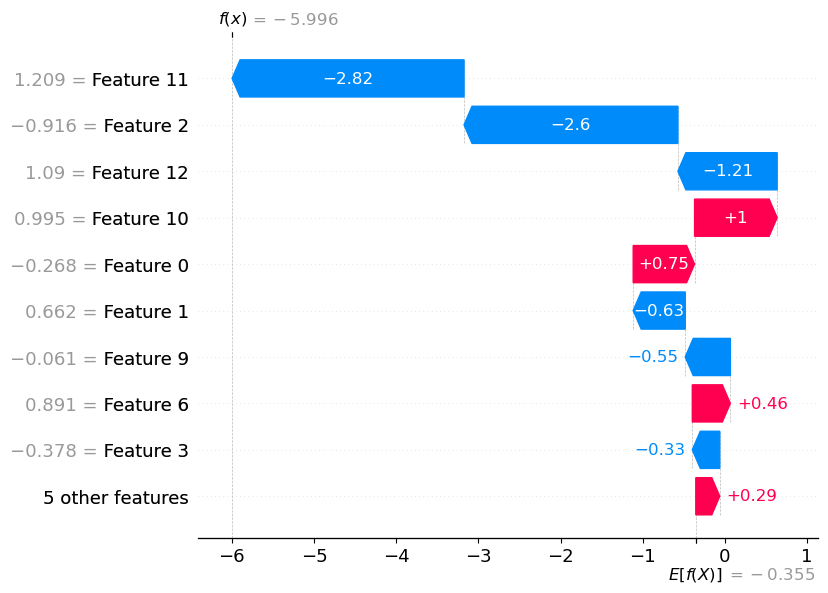

In [35]:
explainer = shap.Explainer(xgb_model, X_scaled)
shap_values = explainer(X_scaled)
shap.summary_plot(shap_values, X, plot_type="bar")
shap.plots.waterfall(shap_values[0])

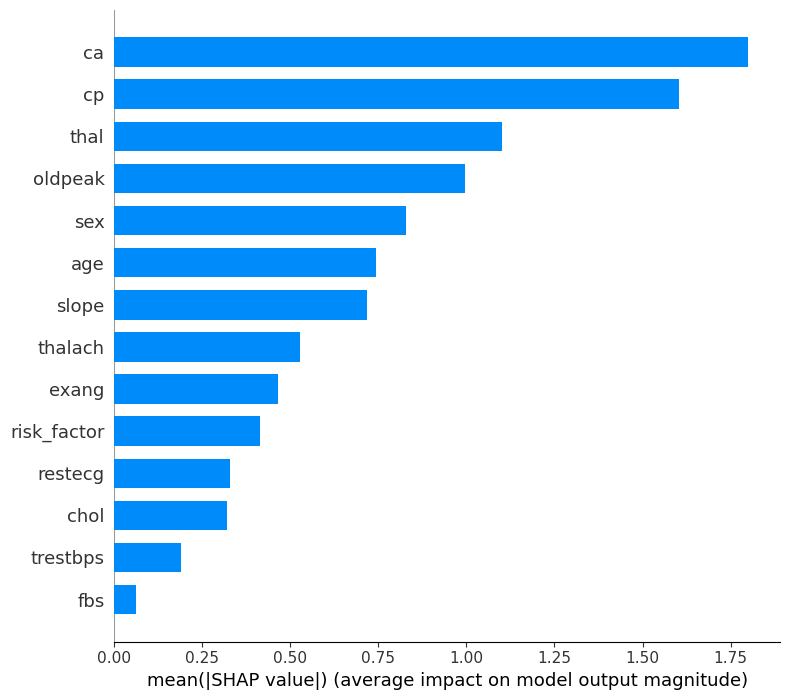

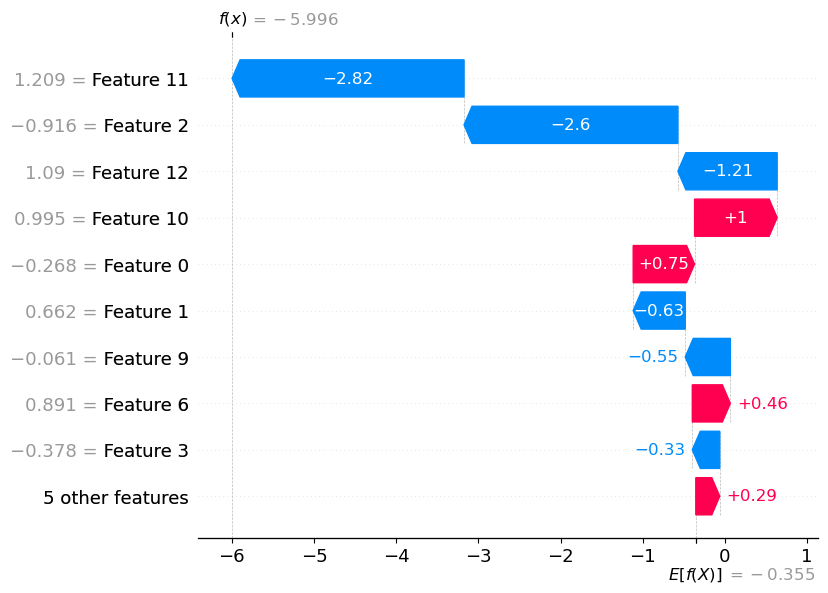

In [36]:
# ساخت explainer برای XGBoost
explainer = shap.Explainer(xgb_model, X_scaled)

# گرفتن مقادیر shap برای کل داده‌ها
shap_values = explainer(X_scaled)

# 1. نمودار summary برای بررسی کلی اهمیت ویژگی‌ها
shap.summary_plot(shap_values, X, plot_type="bar")

# 2. نمودار دقیق برای اولین فرد (مثلاً فرد 0)
shap.plots.waterfall(shap_values[0])

##### **نتیجه نمودار:**

risk_factor:

-  در نمودار Feature Importance (SHAP bar plot) در میانه یا پایین قرار گرفته

    -   یعنی: اثر کم، ولی صفر نیست

-   مدل فهمیده که این ویژگی کمک می‌کنه، ولی هنوز ویژگی‌های غالب مثل "نوع درد قفسه سینه" و "تعداد رگهای مسدود" نقش اصلی رو دارن